<a href="https://colab.research.google.com/github/harsha1067/ASSIGNMENTS/blob/main/Assignment_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast the CocaCola prices passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv


In [143]:
cc = pd.read_csv('CocaCola_Sales_Rawdata.csv')
cc.head(11)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [144]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [145]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<Axes: >

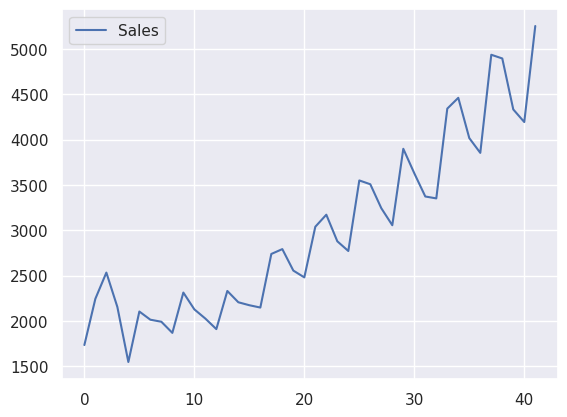

In [146]:
cc.plot()

<Axes: >

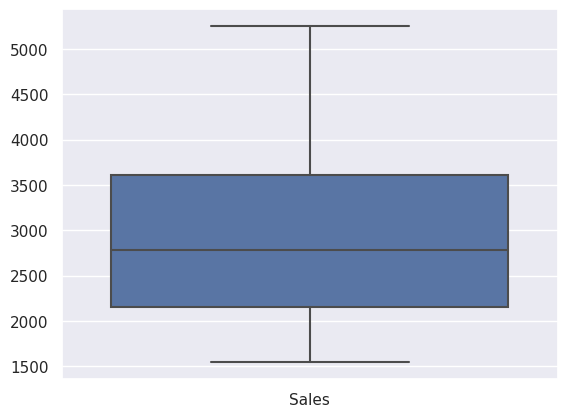

In [147]:
sns.boxplot(data = cc)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

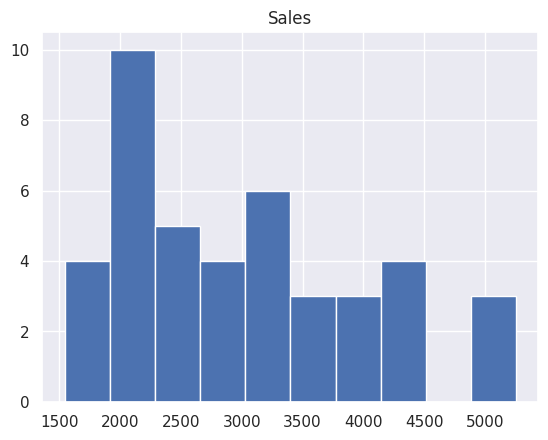

In [148]:
cc.hist()

<Axes: ylabel='Density'>

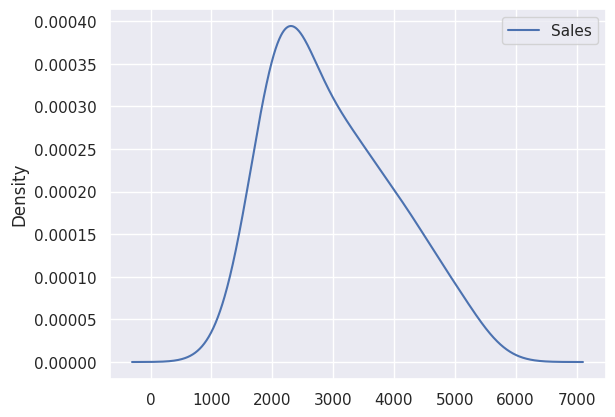

In [149]:
cc.plot(kind = "kde")

In [150]:
np.array(cc["Sales"])

array([1734.827   , 2244.960999, 2533.804993, 2154.962997, 1547.818996,
       2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996,
       2128.32    , 2026.828999, 1910.603996, 2331.164993, 2206.549995,
       2173.967995, 2148.278   , 2739.307999, 2792.753998, 2556.009995,
       2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772.      ,
       3550.      , 3508.      , 3243.859993, 3056.      , 3899.      ,
       3629.      , 3373.      , 3352.      , 4342.      , 4461.      ,
       4017.      , 3854.      , 4936.      , 4895.      , 4333.      ,
       4194.      , 5253.      ])

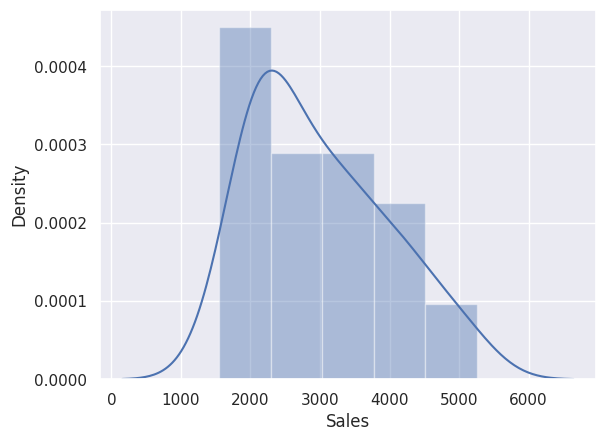

In [151]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
rk = sns.distplot(cc["Sales"], kde = True)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

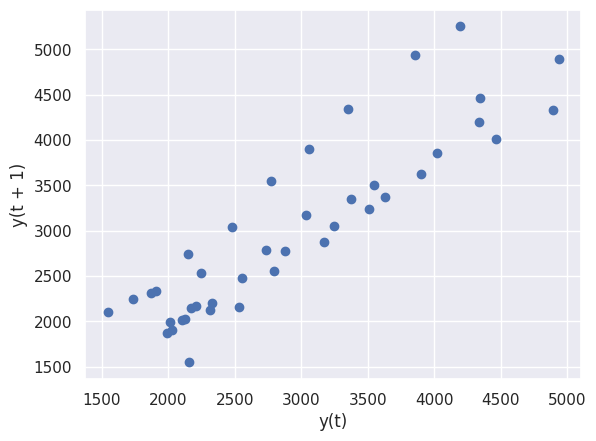

In [152]:
lag_plot(cc["Sales"])

In [153]:
cc.head(11)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [154]:
len(cc)

42

In [155]:
cc.shape

(42, 2)

In [156]:
cc['quarter'] = 0
for i in range(42):
  p = cc['Quarter'][i]
  cc['quarter'][i] = p[0:2]

In [157]:
cc.head(11)

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [158]:
cc['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [159]:
cc_dummies = pd.DataFrame(pd.get_dummies(cc['quarter']), columns = ['Q1', 'Q2', 'Q3', 'Q4'])
cc = pd.concat([cc, cc_dummies], axis = 1)

In [160]:
cc.head(11)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [161]:
cc['t'] = np.arange(1, 43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] = np.log(cc['Sales'])

In [162]:
cc.head(11)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [163]:
train = cc.head(11)
test = cc.tail(11)

<Axes: >

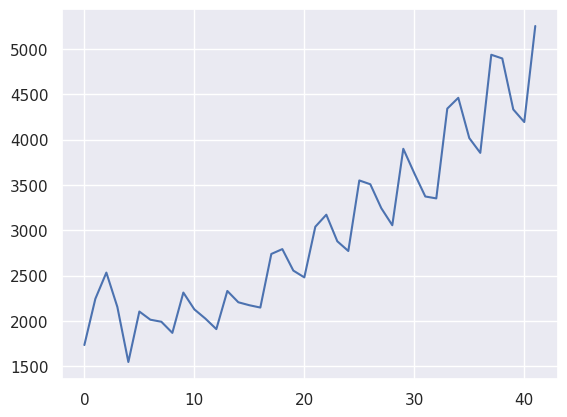

In [164]:
cc['Sales'].plot()

In [165]:
linear_model = smf.ols("Sales~t", data = train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(linear_pred)))
linear_rmse

2183.337035773961

In [166]:
quad_model = smf.ols("Sales~t+t_squared", data = train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t', 't_squared']]))
quad_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(quad_pred)))
quad_rmse

1254.2858955607655

In [167]:
exp_model = smf.ols("Sales_log~t", data = train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
exp_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(exp_pred)))
exp_rmse

4305.545183899056

In [168]:
data = {"MODEL": pd.Series(["rmse_linear", "rmse_quad", "rmse_exp"]), "RMSE_VALUES": pd.Series([linear_rmse, quad_rmse, exp_rmse])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_VALUES'])

,MODEL,RMSE_VALUES
1,rmse_quad,1254.285896
0,rmse_linear,2183.337036
2,rmse_exp,4305.545184


In [169]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header = 0, index_col = 0, parse_dates = True)
data.head(11)

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [170]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [171]:
dataset_cc.to_csv('dataset_cc.csv', header = False)
validation_cc.to_csv('validation_cc.csv', header = False)

In [172]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
train = read_csv('dataset_cc.csv', header = None, index_col = 0, parse_dates = True, squeeze = True)
train.head(11)

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Name: 1, dtype: float64

In [173]:
x = train.values
x = x.astype('float32')
train_size = int(len(x) * 0.5)
train, test = x[0:train_size], x[train_size:]

In [174]:
history = [x for x in train]
pred = list()
for i in range(len(test)):
  coc = history[-1]
  pred.append(coc)
  obs = test[i]
  history.append(obs)
  print('>PREDICTED = %.3f, EXPECTED = %.3f' % (coc, obs))
rmse = sqrt(mean_squared_error(test, pred))
print("RMSE: %.3f" % rmse)

>PREDICTED = 2148.278, EXPECTED = 2739.308
>PREDICTED = 2739.308, EXPECTED = 2792.754
>PREDICTED = 2792.754, EXPECTED = 2556.010
>PREDICTED = 2556.010, EXPECTED = 2480.974
>PREDICTED = 2480.974, EXPECTED = 3039.523
>PREDICTED = 3039.523, EXPECTED = 3172.116
>PREDICTED = 3172.116, EXPECTED = 2879.001
>PREDICTED = 2879.001, EXPECTED = 2772.000
>PREDICTED = 2772.000, EXPECTED = 3550.000
>PREDICTED = 3550.000, EXPECTED = 3508.000
>PREDICTED = 3508.000, EXPECTED = 3243.860
>PREDICTED = 3243.860, EXPECTED = 3056.000
>PREDICTED = 3056.000, EXPECTED = 3899.000
>PREDICTED = 3899.000, EXPECTED = 3629.000
>PREDICTED = 3629.000, EXPECTED = 3373.000
>PREDICTED = 3373.000, EXPECTED = 3352.000
>PREDICTED = 3352.000, EXPECTED = 4342.000
>PREDICTED = 4342.000, EXPECTED = 4461.000
RMSE: 434.401


In [175]:
data = {"MODEL": pd.Series(["rmse_linear", "rmse_quad", "rmse_exp", "RMSE_ARIMA"]), "RMSE_VALUES": pd.Series([linear_rmse, quad_rmse, exp_rmse, rmse])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_VALUES'])

,MODEL,RMSE_VALUES
3,RMSE_ARIMA,434.400665
1,rmse_quad,1254.285896
0,rmse_linear,2183.337036
2,rmse_exp,4305.545184


Forecast the Airlines prices passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [176]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
from datetime import datetime

In [177]:
AL = pd.read_excel('Airlines+Data.xlsx')
AL.head(11)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [178]:
AL.shape

(96, 2)

In [179]:
AL.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [180]:
AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [181]:
AL['Month'] = pd.to_datetime(AL['Month'], infer_datetime_format = True)
AL = AL.set_index(['Month'])
AL.head(11)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


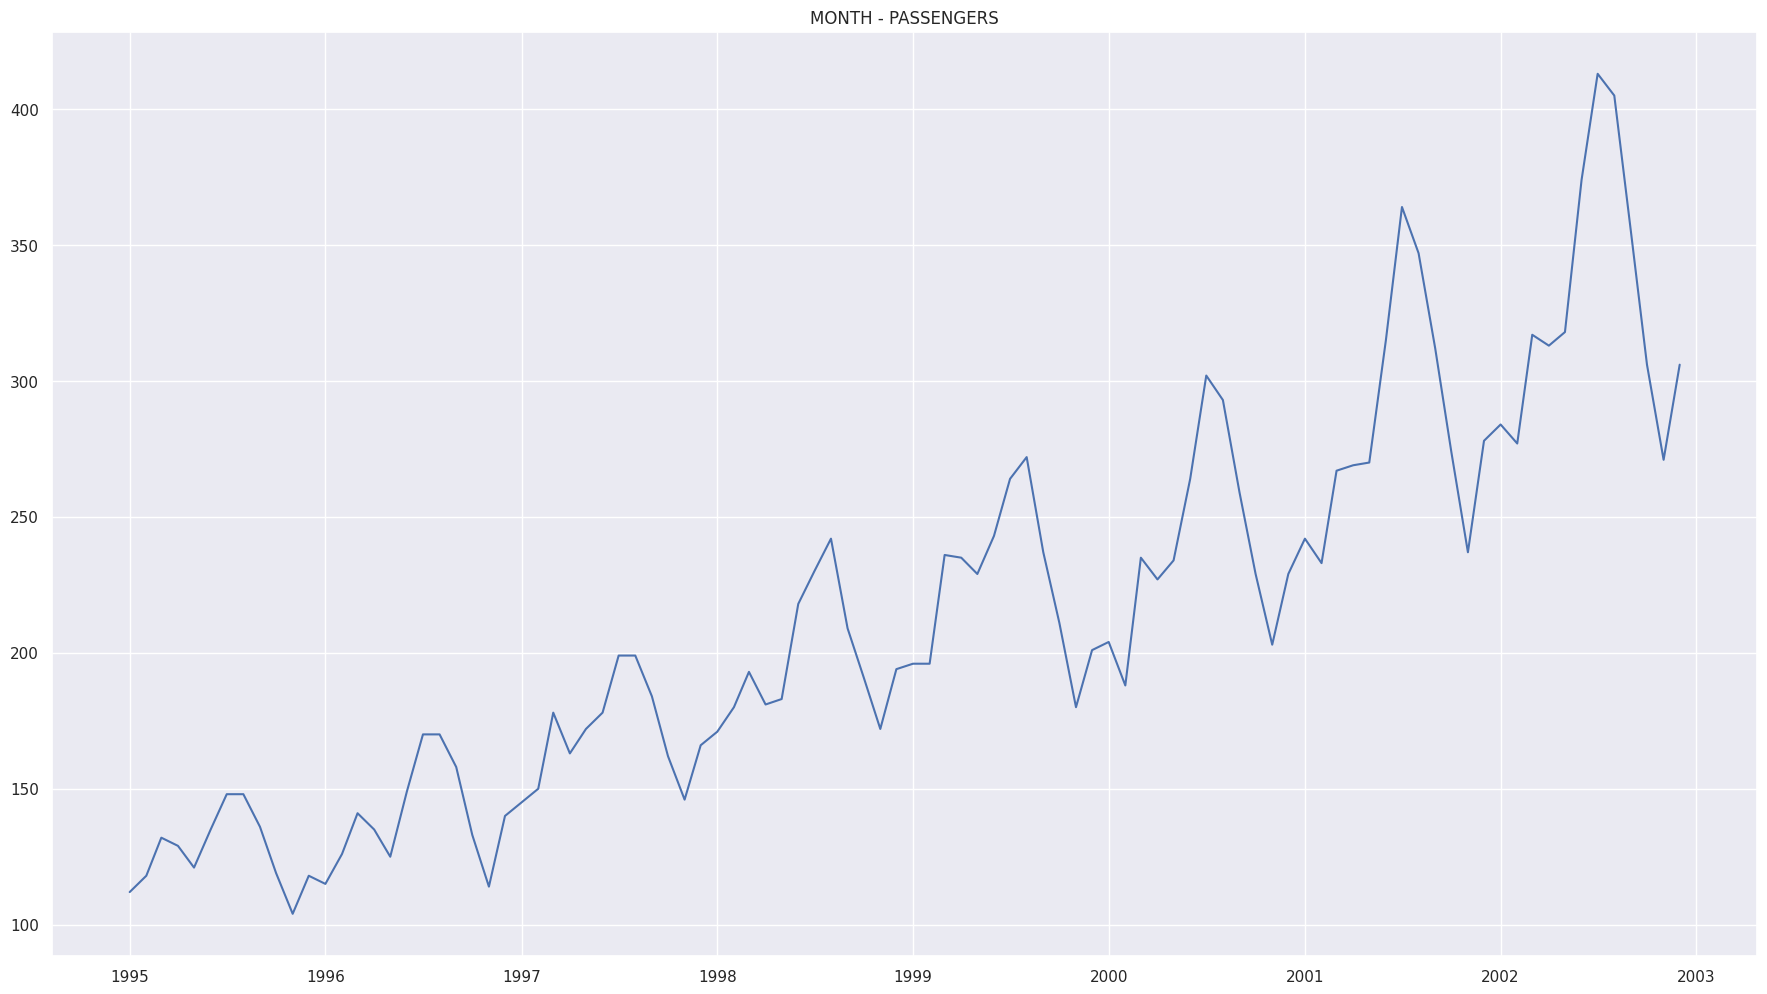

In [182]:
plt.figure(figsize = (22, 12))
plt.title("MONTH - PASSENGERS")
plt.plot(AL)

In [183]:
rol_mean = AL.rolling(window = 12).mean()
rol_std = AL.rolling(window = 12).std()

In [184]:
print(rol_mean.head(11))
print(rol_std.head(11))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN


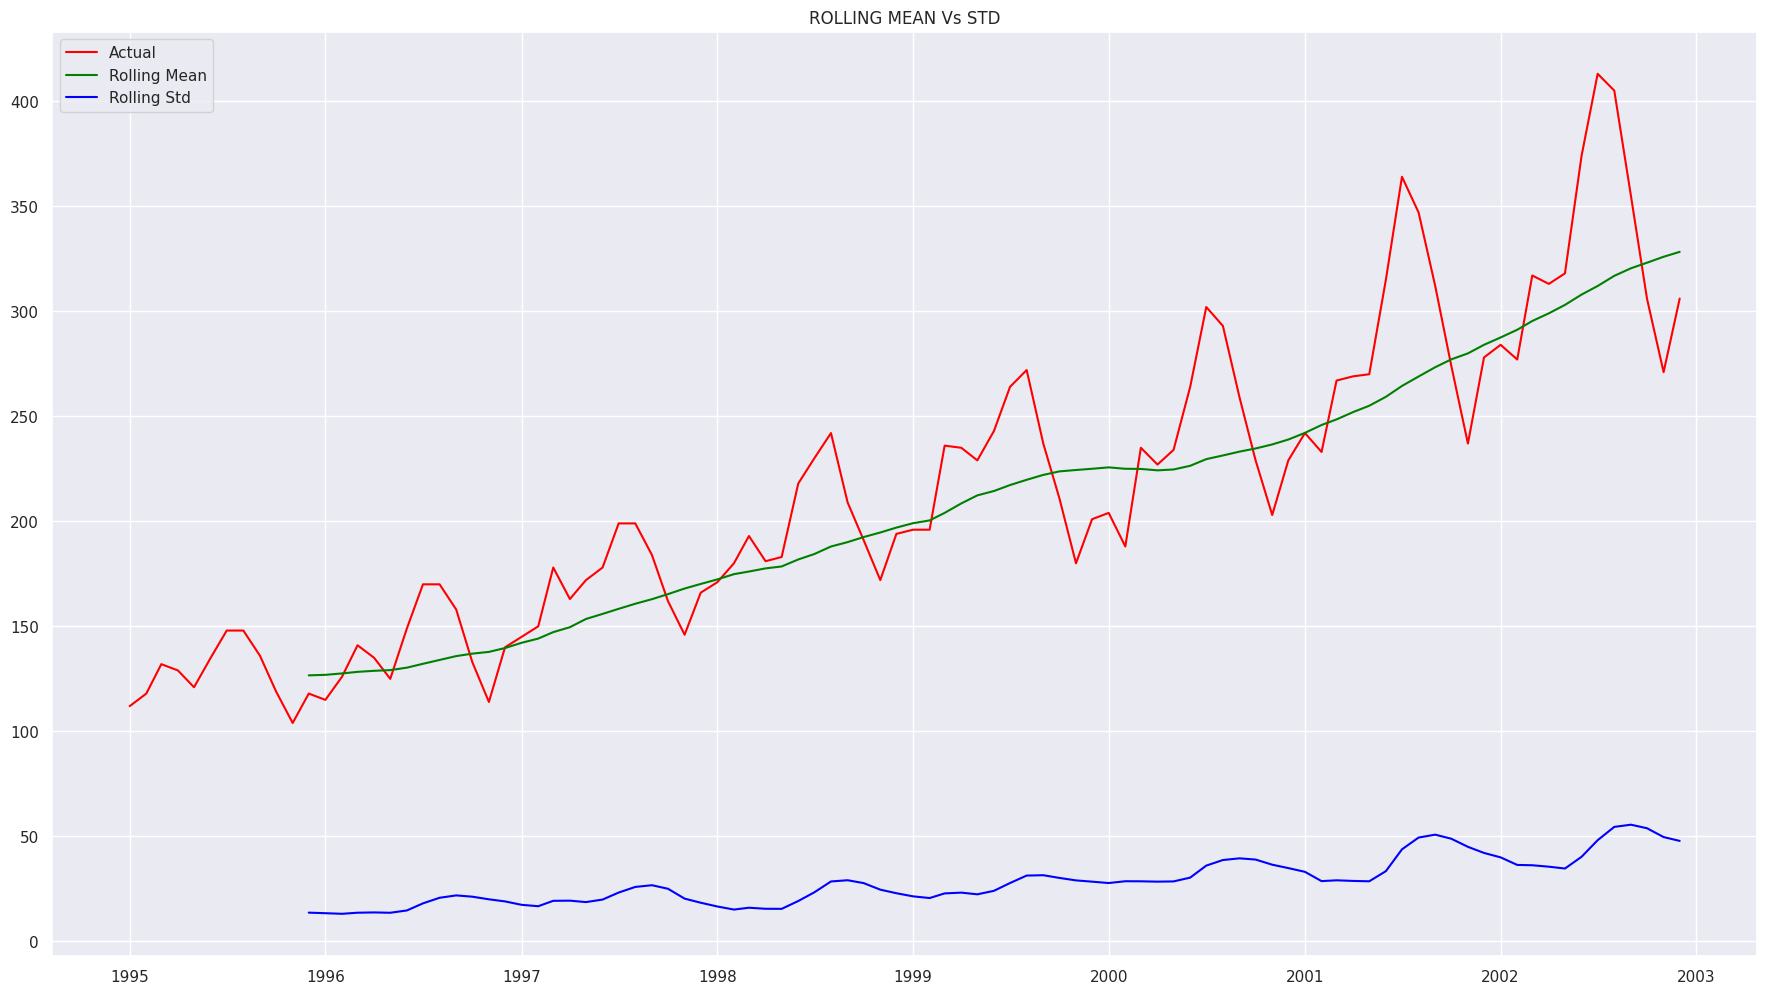

In [185]:
plt.figure(figsize = (22, 12))
actual = plt.plot(AL, color = 'red', label = 'Actual')
mean = plt.plot(rol_mean, color = 'green', label = 'Rolling Mean')
std = plt.plot(rol_std, color = 'blue', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("ROLLING MEAN Vs STD")
plt.show(block = False)

In [186]:
from statsmodels.tsa.stattools import adfuller
print('Dickey - Fuller Test:')
dftest = adfuller(AL['Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No of Obs'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Dickey - Fuller Test:
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No of Obs               83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


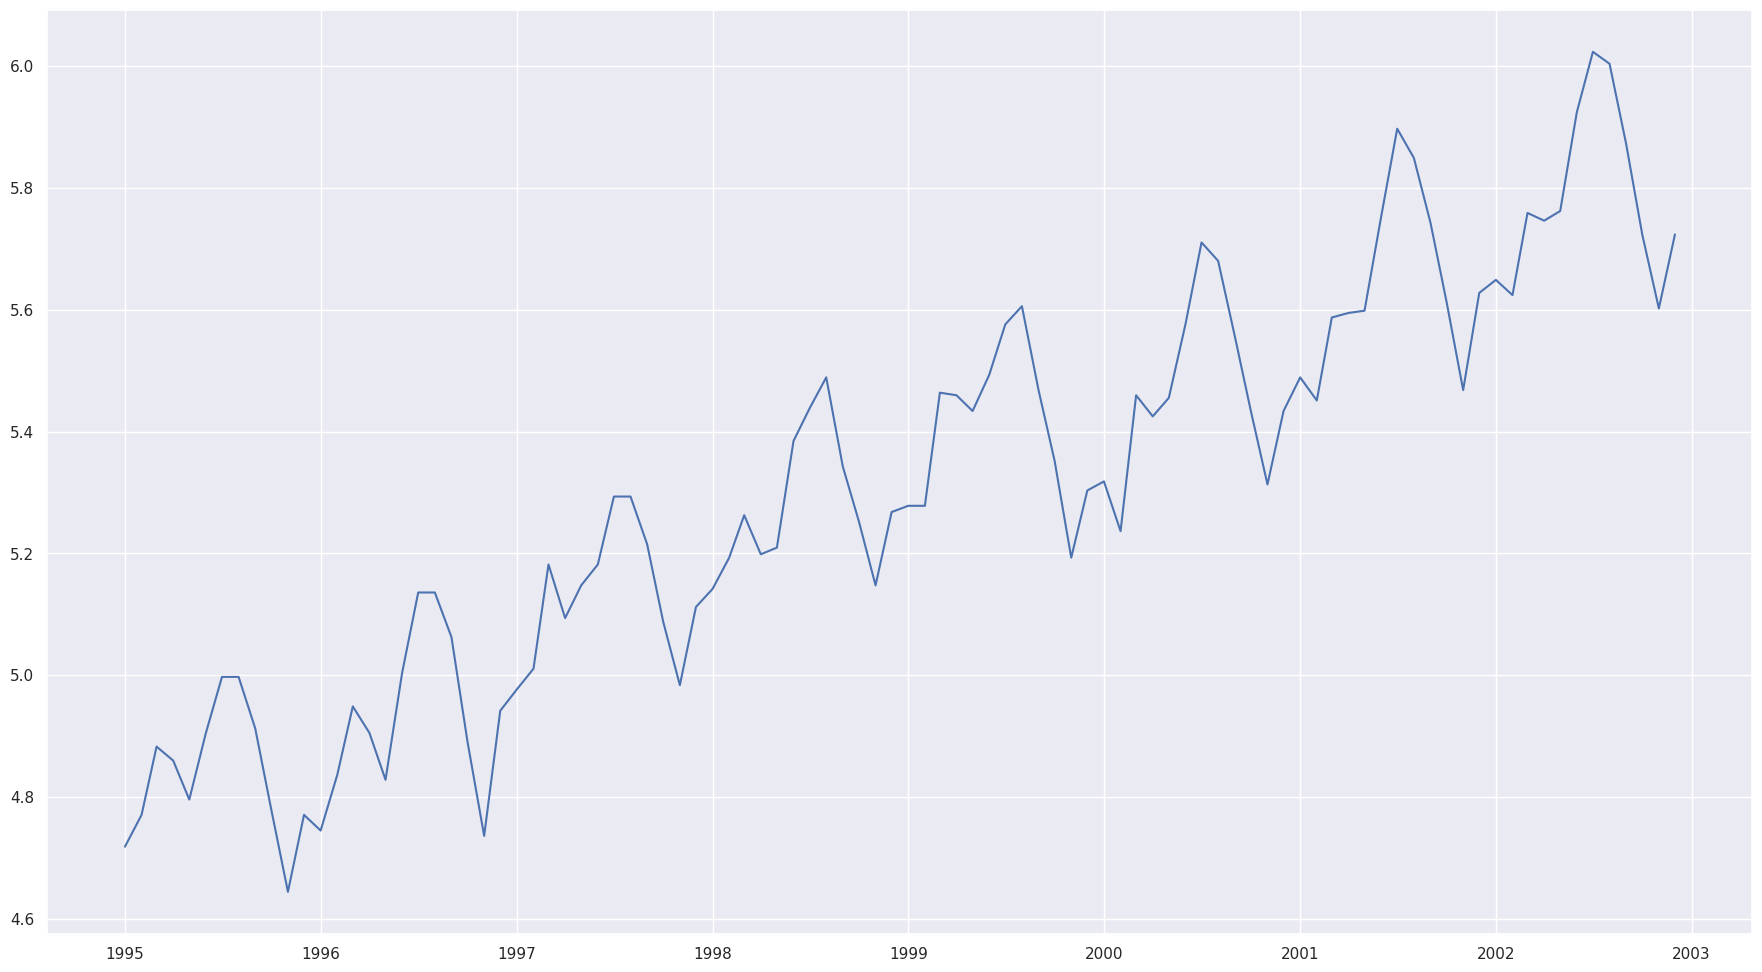

In [187]:
plt.figure(figsize = (22, 12))
AL_log = np.log(AL)
plt.plot(AL_log)

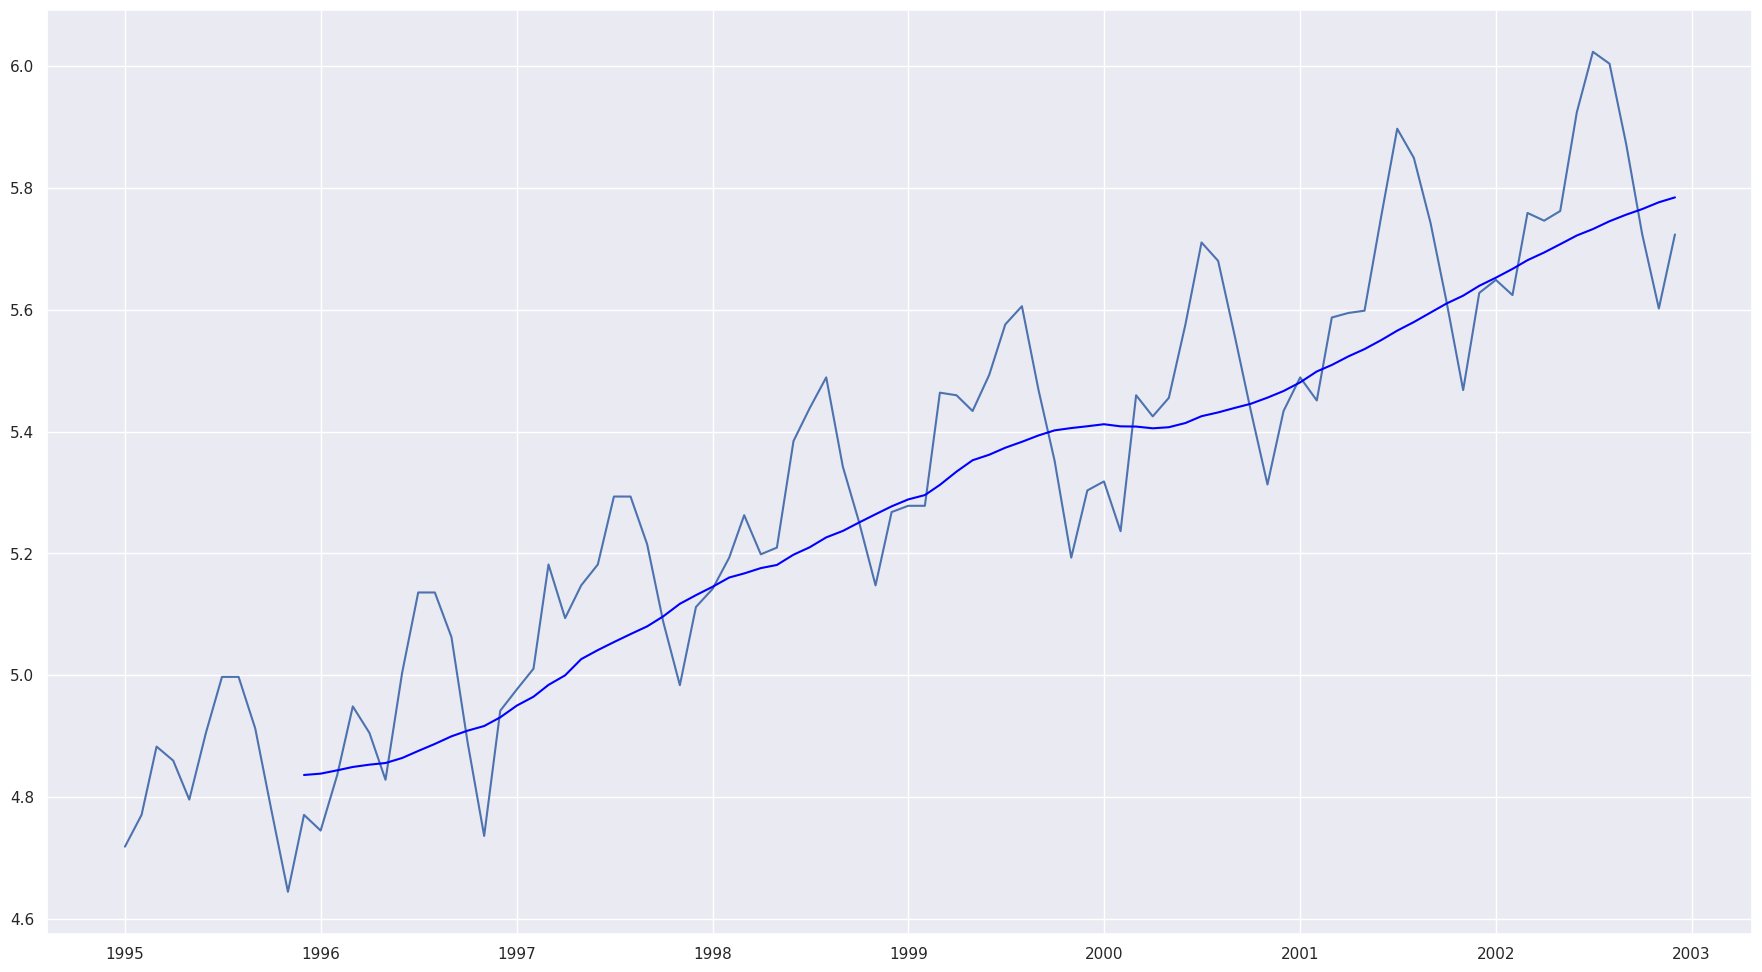

In [188]:
plt.figure(figsize = (22, 12))
M_AVG = AL_log.rolling(window = 12).mean()
M_STD = AL_log.rolling(window = 12).std()
plt.plot(AL_log)
plt.plot(M_AVG, color = 'blue')

In [189]:
AL_log_diff = AL_log - M_AVG
AL_log_diff.head(11)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [190]:
AL_log_diff = AL_log_diff.dropna()
AL_log_diff.head(11)

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


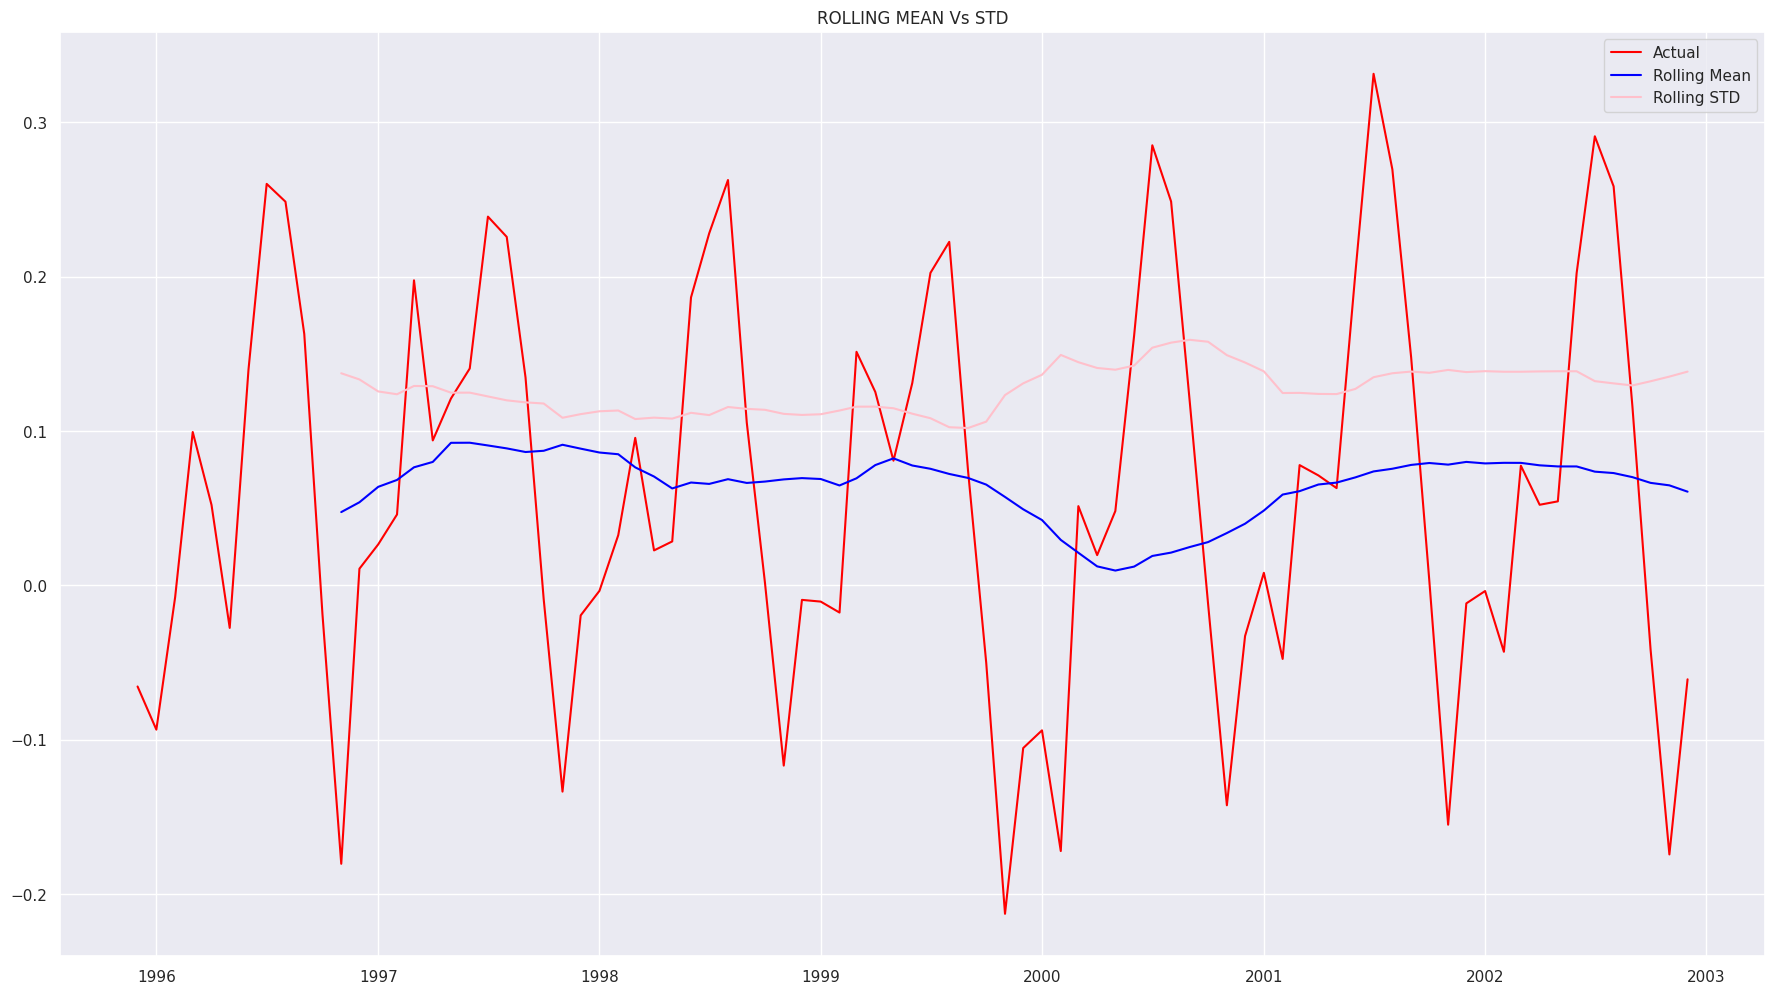

Dickey- Fuller Test:
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No of Obs               72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [191]:
def stationarity(timeseries):
  rol_mean = timeseries.rolling(window = 12).mean()
  rol_std = timeseries.rolling(window = 12).std()
  plt.figure(figsize = (22, 12))
  actual = plt.plot(timeseries, color = 'red', label = 'Actual')
  mean = plt.plot(rol_mean, color = 'blue', label = 'Rolling Mean')
  std = plt.plot(rol_std, color = 'pink', label = 'Rolling STD')
  plt.legend(loc = 'best')
  plt.title("ROLLING MEAN Vs STD")
  plt.show(block = False)
  print('Dickey- Fuller Test:')
  dftest = adfuller(timeseries["Passengers"], autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No of Obs'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)
stationarity(AL_log_diff)

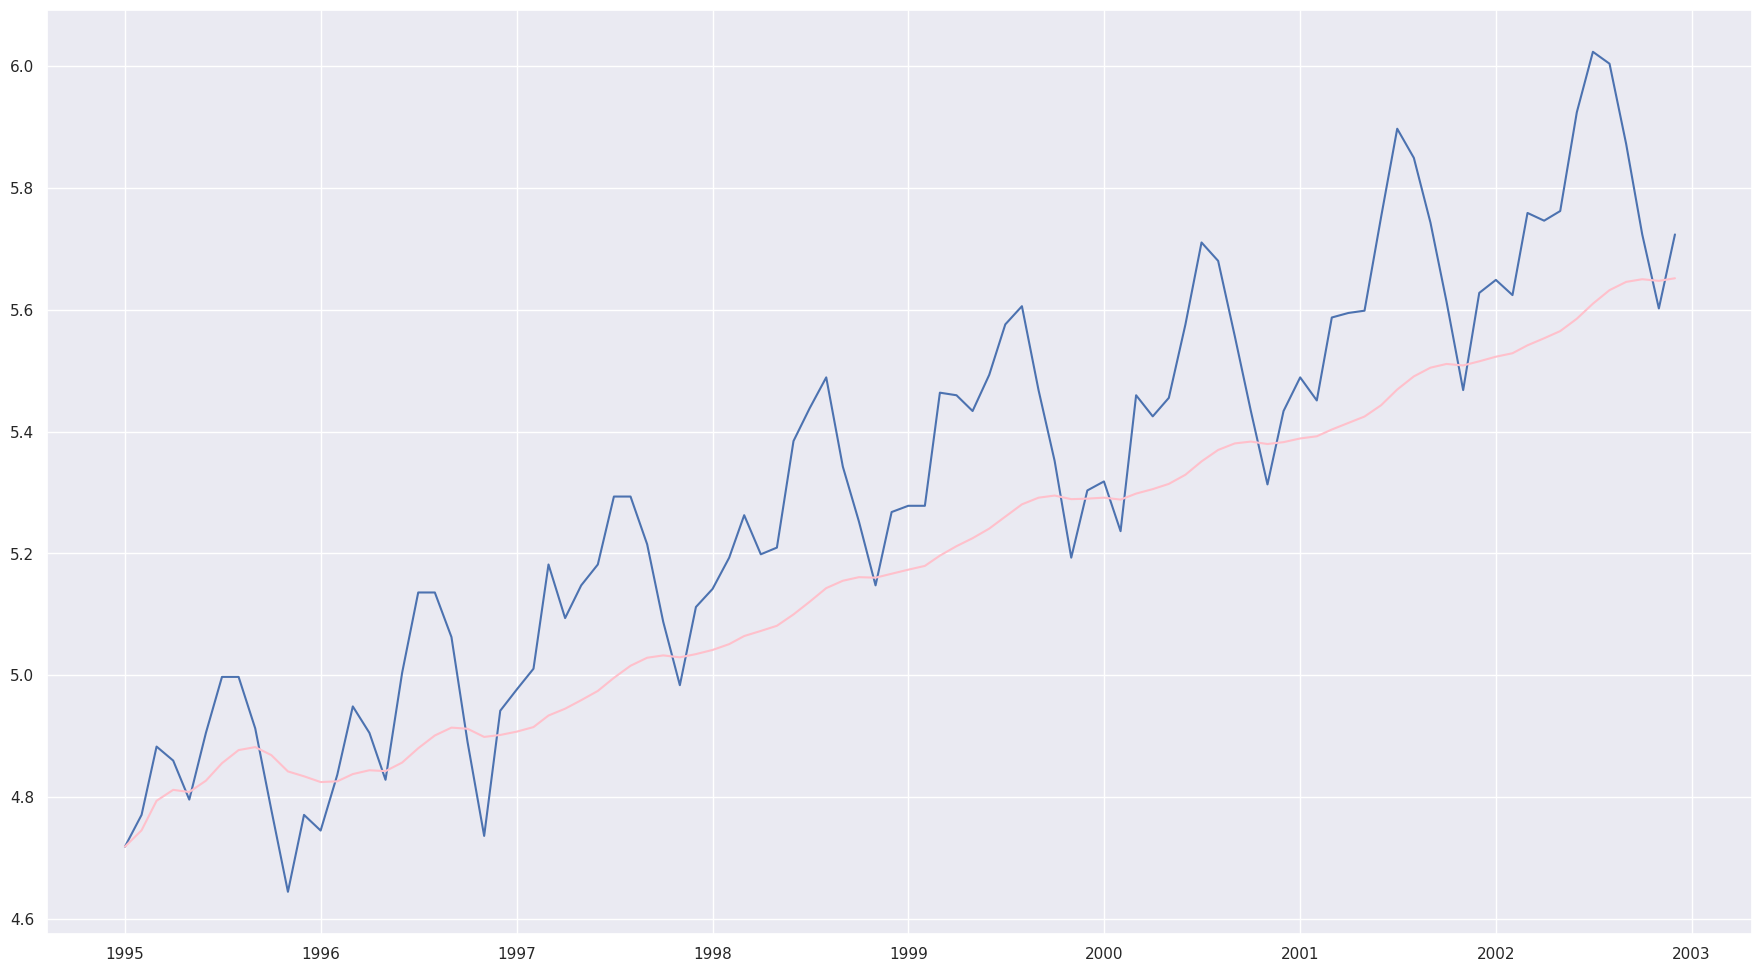

In [192]:
plt.figure(figsize = (22, 12))
exp_AL = AL_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(AL_log)
plt.plot(exp_AL, color = 'pink')

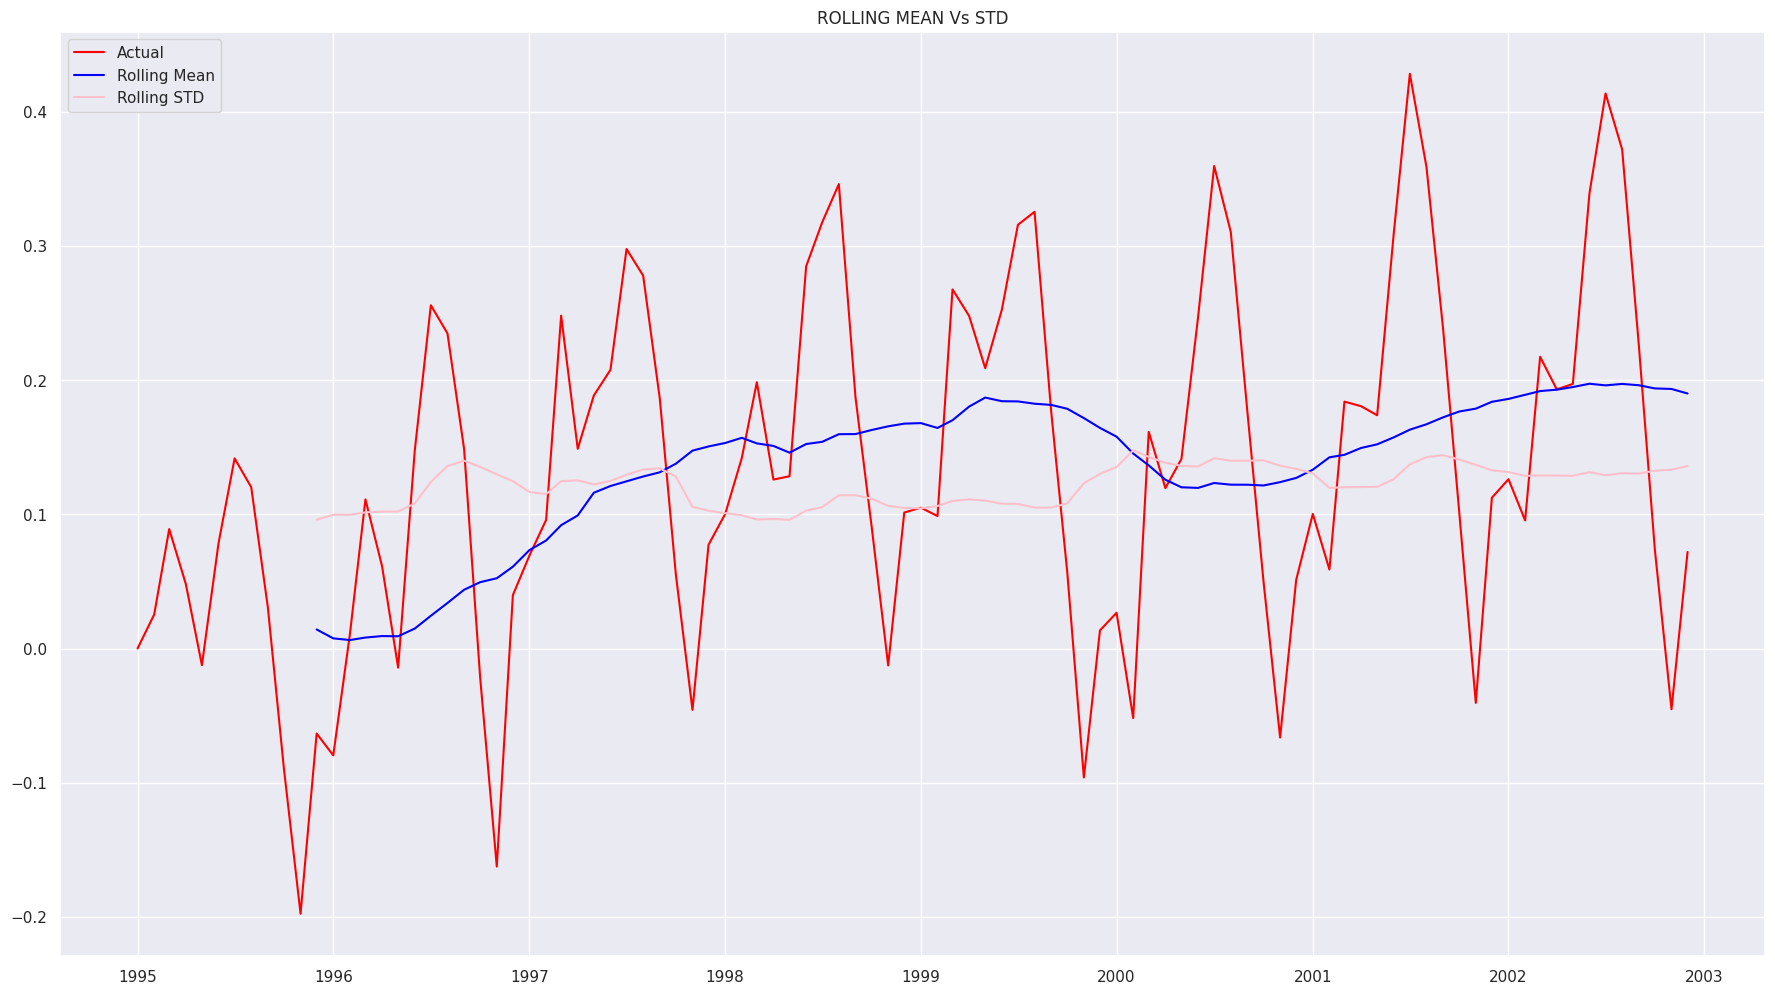

Dickey- Fuller Test:
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No of Obs               83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [193]:
exp_AL_diff = AL_log - exp_AL
stationarity(exp_AL_diff)

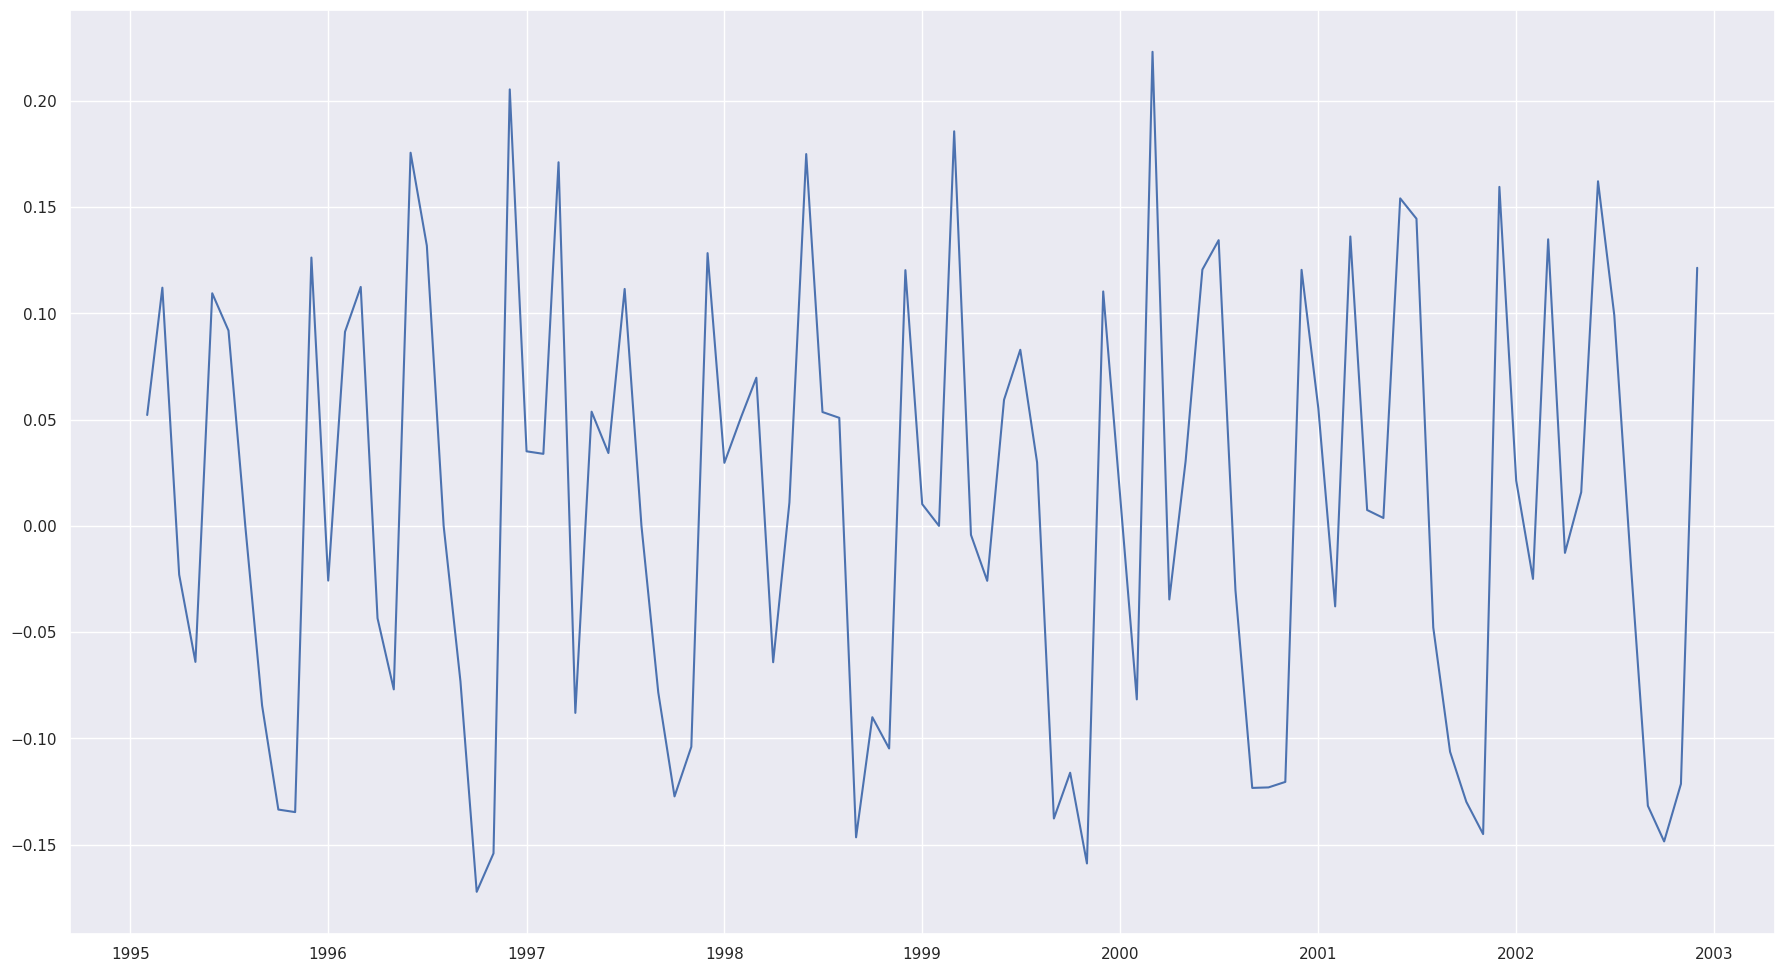

In [194]:
plt.figure(figsize = (22, 12))
AL_shift = AL_log - AL_log.shift()
plt.plot(AL_shift)

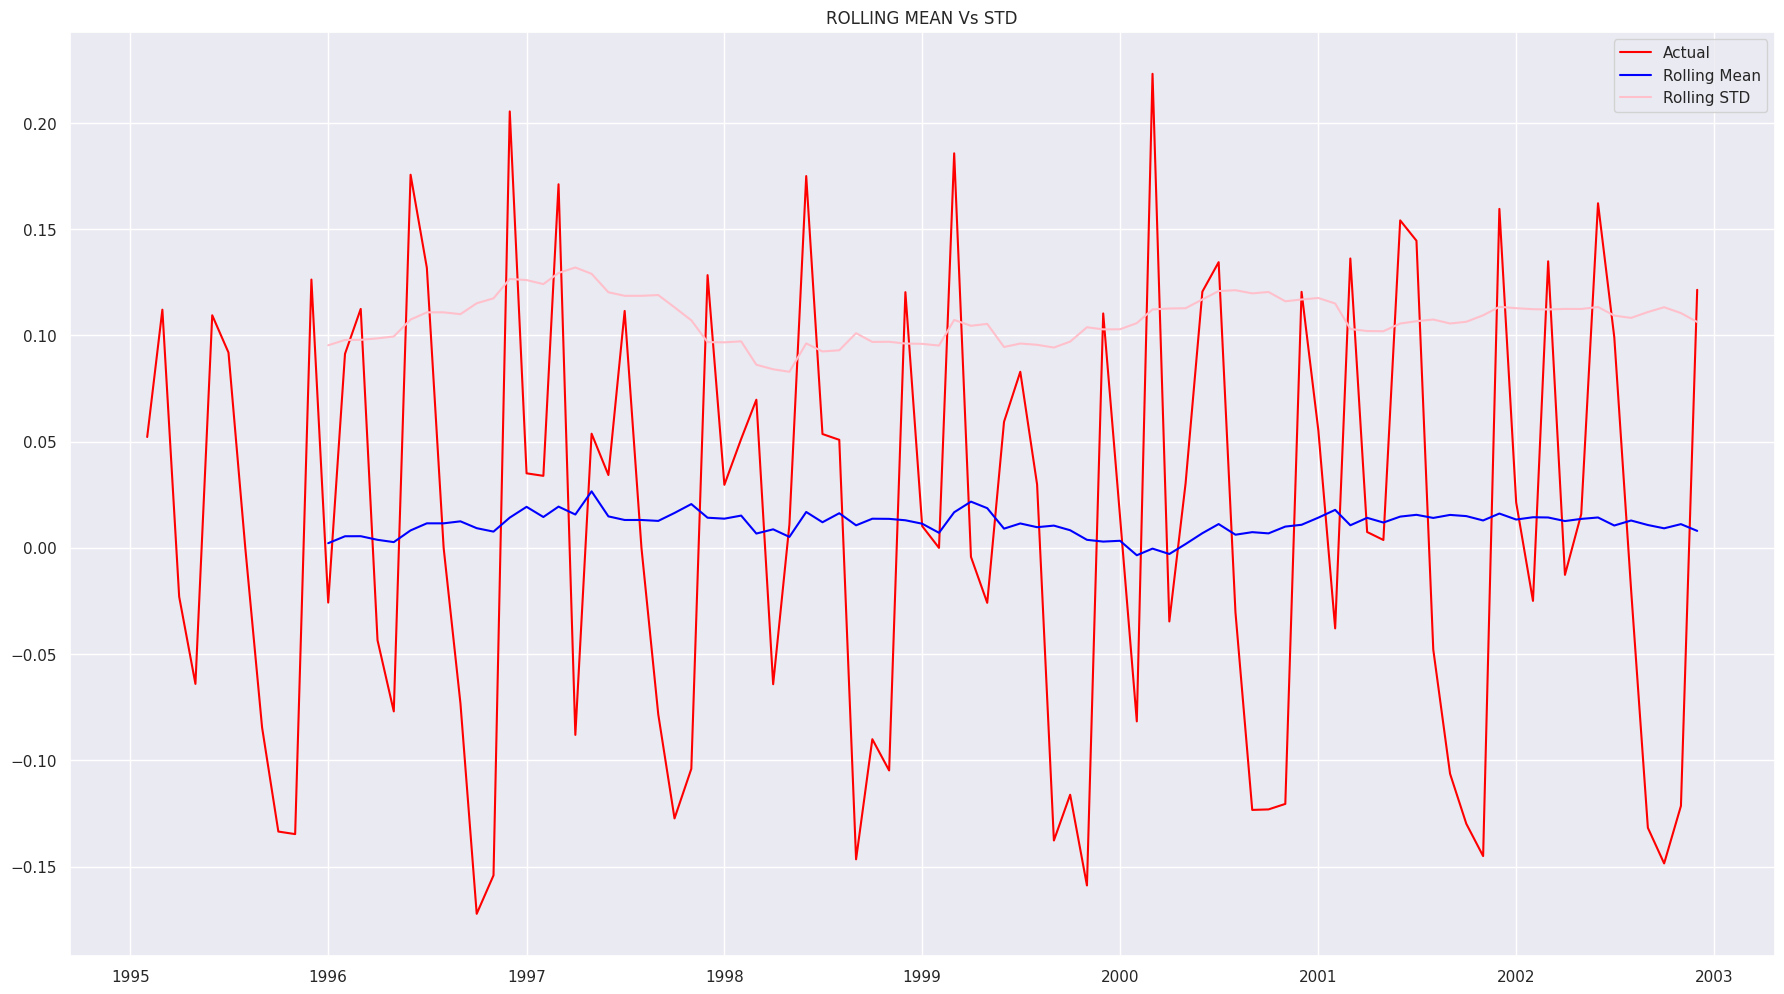

Dickey- Fuller Test:
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No of Obs               82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [195]:
AL_shift = AL_shift.dropna()
stationarity(AL_shift)


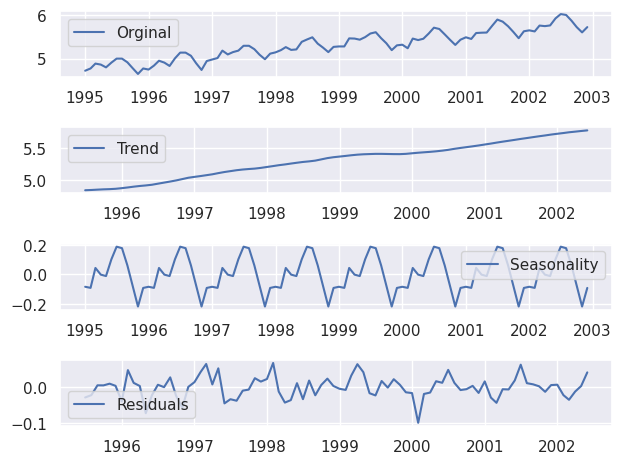

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
SD = sd(AL_log)

trend = SD.trend
seasonal = SD.seasonal
residual = SD.resid

plt.subplot(411)
plt.plot(AL_log, label = 'Orginal')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

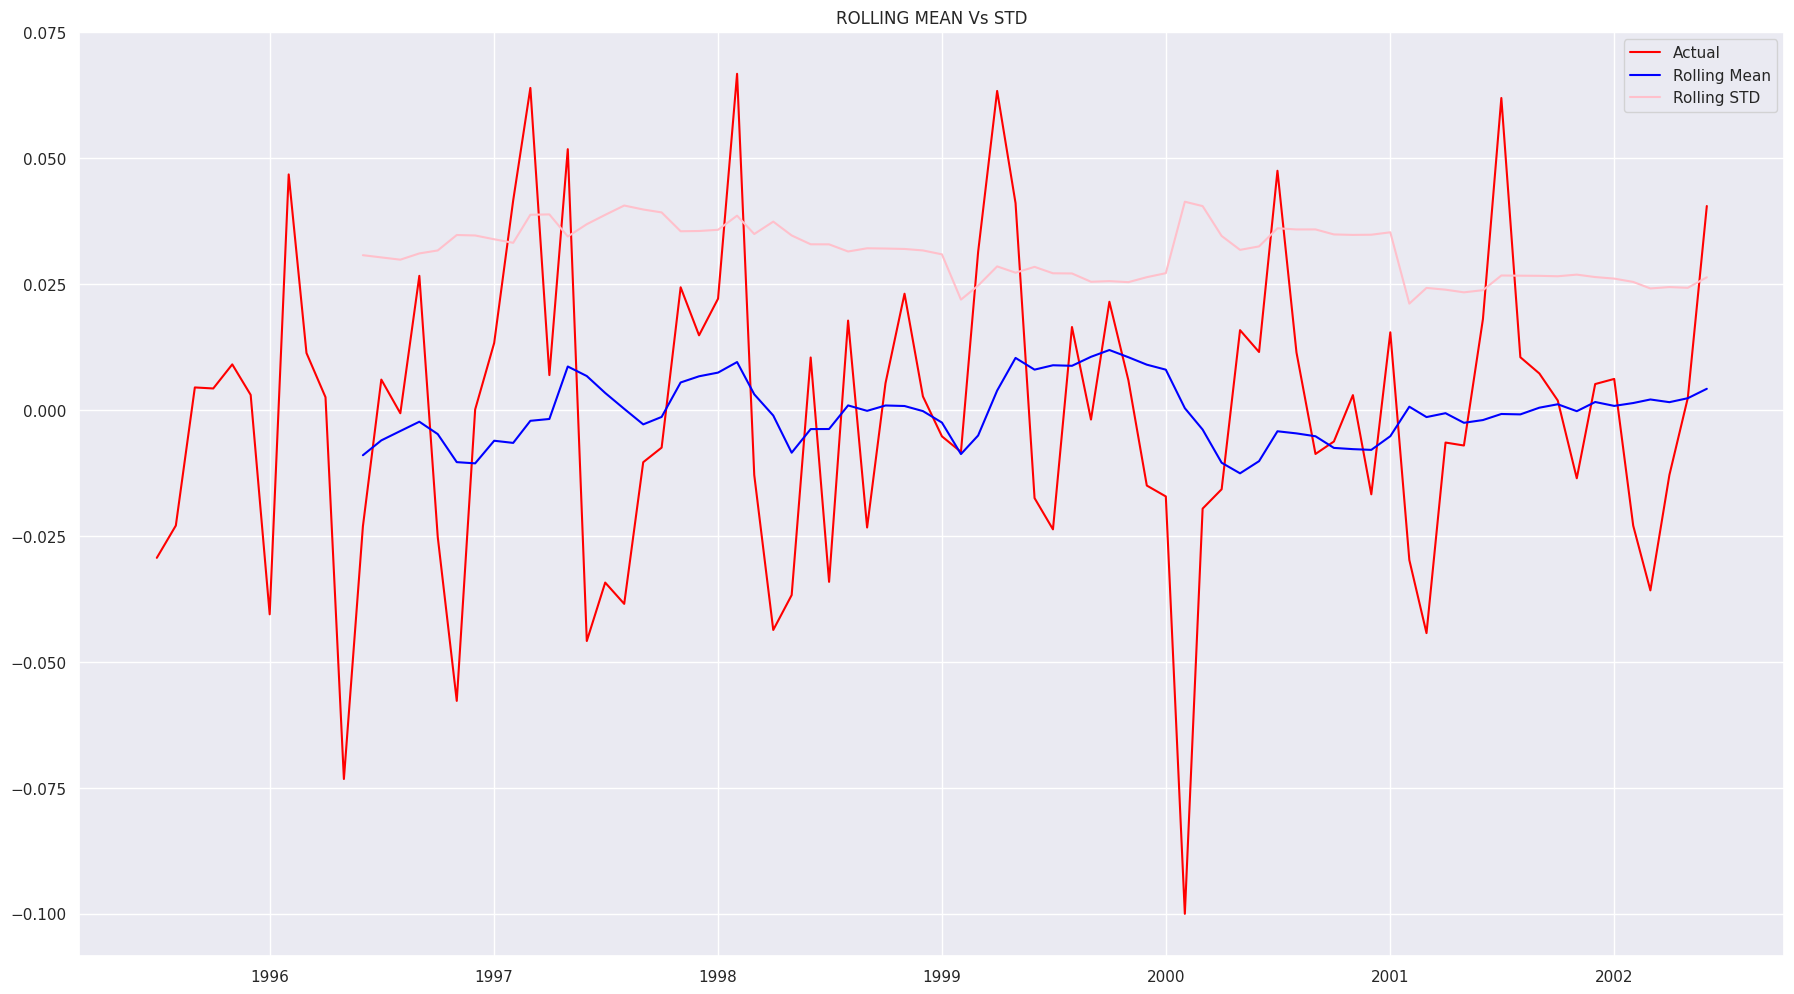

Dickey- Fuller Test:


KeyError: ignored

In [197]:
SD_AL = residual
SD_AL = SD_AL.dropna()
stationarity(SD_AL)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(AL_shift, nlags = 22)
lag_pacf = pacf(AL_shift, nlags = 22, method = 'ols')

plt.figure(figsize = (22, 12))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96/np.sqrt(len(AL_shift)), linestyle = '--', color = 'green')
plt.axhline(y = 1.96/np.sqrt(len(AL_shift)), linestyle = '--', color = 'green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96/np.sqrt(len(AL_shift)), linestyle = '--', color = 'green')
plt.axhline(y = 1.96/np.sqrt(len(AL_shift)), linestyle = '--', color = 'green')
plt.title("AUTOCORRELATION FUNCTION")